# Covid evolution in Ecuador - Project

## This project will take data from covid-19, from a public api, and show the evolution in Ecuador, through a graph, from the first day to the present day.

In [76]:
# Importing the 'requests' library to request data
import requests as r

In [77]:
# Defining the URL to access the data
url = 'https://api.covid19api.com/dayone/country/ecuador'
resp = r.get(url)

In [78]:
# Looking at the status of the requisition
resp.status_code

200

In [79]:
# Saving the data that was returned by the API
raw_data = resp.json()

In [80]:
# Showing the data
raw_data[0]

{'Active': 6,
 'City': '',
 'CityCode': '',
 'Confirmed': 6,
 'Country': 'Ecuador',
 'CountryCode': 'EC',
 'Date': '2020-03-01T00:00:00Z',
 'Deaths': 0,
 'ID': 'a63c3c63-06c3-4023-9cf8-ad07cbefc307',
 'Lat': '-1.83',
 'Lon': '-78.18',
 'Province': '',
 'Recovered': 0}

In [81]:
# Filtering data we need
final_data = []
for obs in raw_data:
  final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

In [82]:
# Checking the filtered data and putting a header
final_data.insert(0, ['confirmed', 'deaths', 'recovered', 'active', 'date'])
#final_data

In [83]:
# Creating constants to manipulate data
CONFIRMED = 0
DEATHS = 1
RECOVERED = 2
ACTIVE = 3
DATE = 4

In [84]:
# Filtering the date and removing the time zone
for i in range(1, len(final_data)):
  final_data[i][DATA] = final_data[i][DATA][:10]

In [85]:
#final_data

In [86]:
# Importing the 'datetime' library to transform information into date
import datetime as dt

In [87]:
# Importing csv library to save data in csv format
import csv

In [88]:
# Saving the file.csv with data
with open('ecuador_covid.csv', 'w') as file:
  writer = csv.writer(file)
  writer.writerows(final_data)

In [89]:
# Transforming a string representing a date to a real date
for i in range(1, len(final_data)):
  final_data[i][DATA] = dt.datetime.strptime(final_data[i][DATA], '%Y-%m-%d')

In [90]:
#final_data

## Creating helper functions

In [91]:
# Function that builds the y-axis data
def get_datasets(y, labels):
  if type(y[0]) == list:
    datasets = []
    for i in range(len(y)):
      datasets.append({
          'label': labels[i],
          'data': y[i]
      })
    return datasets
  else:
    return [
        {
            'label': labels[0],
            'data': y
        }
    ]

In [92]:
# Function that defines the title of the graph
def set_title(title=''):
  if title != '':
    display = 'true'
  else:
    display = 'false'
  return {
      'title': title,
      'display': display
  }

In [93]:
# Function that creates the dictionary that represents the graph
def create_chart(x, y, labels, kind='bar', title=''):
  
  datasets = get_datasets(y, labels)
  options = set_title(title)

  chart = {
      'type': kind,
      'data': {
          'labels': x,
          'datasets': datasets
      },
      'options': options
  }

  return chart

In [94]:
# Creating a function that will make an API request using the dictionary
def get_api_chart(chart):
  url_base = 'https://quickchart.io/chart'
  resp = r.get(f'{url_base}?c={str(chart)}')
  return resp.content

In [95]:
# Creating function to save the image
def save_image(path, content):
  with open(path, 'wb') as image:
    image.write(content)

In [96]:
# Importing libraries to show the image
from PIL import Image
from IPython.display import display

In [97]:
# Creating function to show the image
def display_image(path):
  img_pil = Image.open(path)
  display(img_pil)

## Getting the data to graph

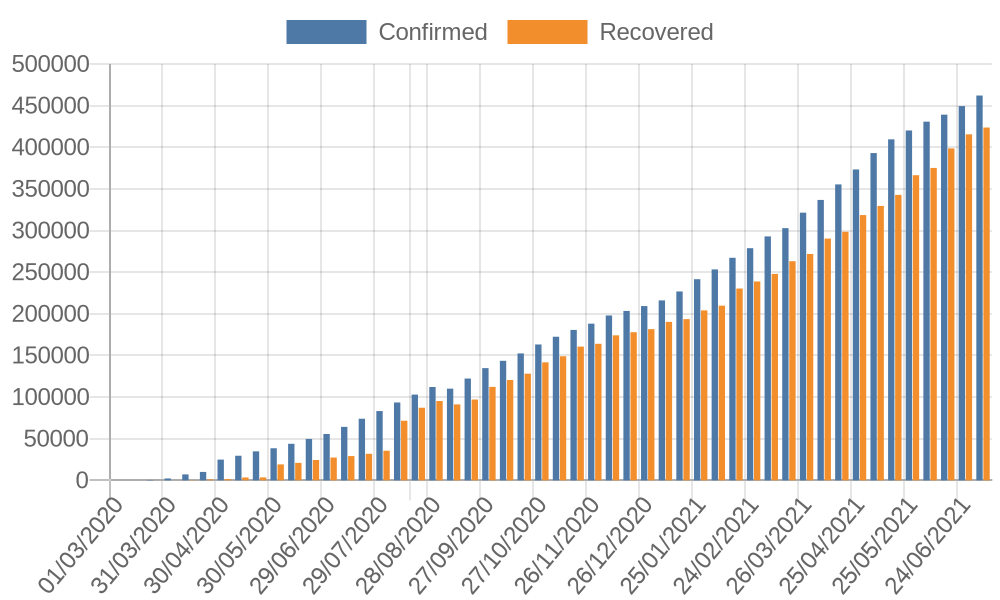

In [98]:
# Getting the data and showing the graph
y_data_1 = []
for obs in final_data[1::10]:
  y_data_1.append(obs[CONFIRMADOS])

y_data_2 = []
for obs in final_data[1::10]:
  y_data_2.append(obs[RECUPERADOS])

labels = ['Confirmed', 'Recovered']

x = []
for obs in final_data[1::10]:
  x.append(obs[DATA].strftime('%d/%m/%Y'))

chart = create_chart(x, [y_data_1, y_data_2], labels, title='Graph confirmed vs recovered')
chart_content = get_api_chart(chart)
save_image('my-first-graph.png', chart_content)
display_image('my-first-graph.png')

In [99]:
# Importing library to parse our textual value to a special textual value for URL
from urllib.parse import quote

In [100]:
# Function to generate a QRcode of the generated graph
def get_api_qrcode(link):
  text = quote(link) # parsing the link to url
  url_base = 'https://quickchart.io/qr'
  resp = r.get(f'{url_base}?text={text}')
  return resp.content

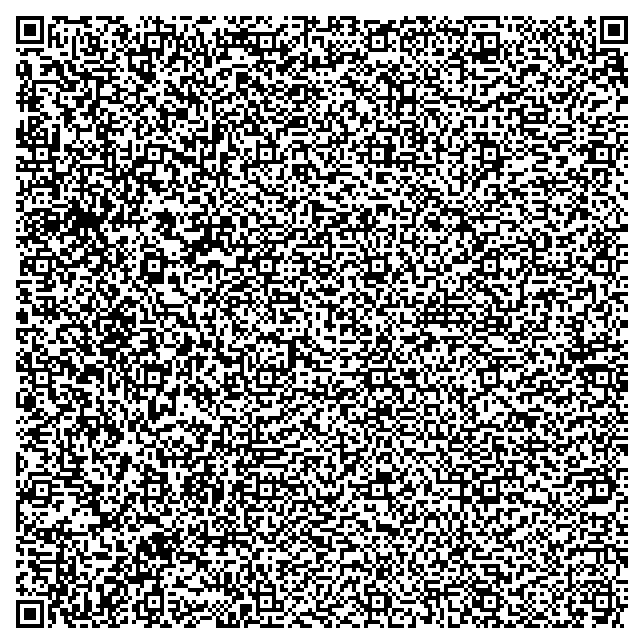

In [101]:
# Retrieving the link responsible for generating the graph
url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')